# Heatmap associated with "HiPR-FISH Spatial Mapping of Cheese Rind Microbial Communities"

This notebook demonstrates how the spatial associaton heatmap in this pub was created.

In [63]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/emilycpweiss/miniconda3/envs/tidyjupyter/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] heatmaply_1.4.2   viridis_0.6.2     viridisLite_0.4.1 plotly_4.10.1    
[5] ggplot2_3.4.0    

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-9       tidyselect_1.2.0   repr_1.1.6         reshape2_1.4.4    
 [5] purrr_1.0.1        colorspace_2.1-0   vctrs_0.5.2        generics_0.1.3    
 [9] htmltools_0.5.4    yaml_2.3.7         base64enc_0.1-3    utf8_1.2.3        
[13] rlang_1.0.6        pillar_1.8.1       glue_1.6.2         withr_2.5.0       
[17] RColorBrewer_1.1-3 registry_0.5-1     uuid_1.1-0         plyr_1.8.8        
[21] foreach_1.5.2    

## Load in and format the data

In [243]:
library(gplots)#load package for heatmap
sig=read.csv("../data/log2fcspatial.csv")#load spatial association data frame for rind across all cheeses
x=data.matrix(sig) #convert to numeric matrix
rownames(x)<-sig[,1] #add back rownames
x=x[,2:54] #remove unwanted column
x

,Agrococcus.casei,Ancrocorticia.populi,Brachybacterium.ginsengisoli,Brachybacterium.tyrofermentans,Brevibacterium.aurantiacum,Corynebacterium.casei,Corynebacterium.terpenotabidum,Flaviflexus.ciconiae,Garicola.koreensis,Glutamicibacter.arilaitensis,⋯,Geotrichum.candidum.4,Geotrichum.candidum.5,Torulaspora,Aspergillus.flavus,Paracoccidioides.lutzii,Fusarium.solani,Graphium.fructicola,Nectria.cinnabarina,Neonectria.neomacrospora,Scopulariopsis.brevicaulis
Agrococcus casei,0.0000000,0.00000000,0.00000000,0.0000000,0.000000,0,0.0000000,0.0000000,0.0000000,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0
Ancrocorticia populi,0.0000000,1.22373957,-0.85226524,0.0000000,0.000000,0,-0.2773897,-1.2963106,0.0000000,0,⋯,0,0.0000000,0.6631454,0,0.0000000,0.5965505,-0.548601,0.000000,0.5228408,0
Brachybacterium ginsengisoli,0.0000000,-0.85226524,0.39503564,0.0000000,0.000000,0,0.0000000,0.0000000,0.0000000,0,⋯,0,0.0000000,1.7036894,0,-0.2868811,1.3028193,0.000000,0.000000,0.0000000,0
Brachybacterium tyrofermentans,0.0000000,0.00000000,0.00000000,0.0000000,0.000000,0,0.0000000,0.0000000,0.0000000,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.000000,0.000000,3.7958593,0
Brevibacterium aurantiacum,0.0000000,0.00000000,0.00000000,0.0000000,0.000000,0,0.0000000,0.0000000,0.0000000,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0
Corynebacterium casei,0.0000000,0.00000000,0.00000000,0.0000000,0.000000,0,0.0000000,0.0000000,0.0000000,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0
Corynebacterium terpenotabidum,0.0000000,-0.27738970,0.00000000,0.0000000,0.000000,0,0.0000000,3.5734669,0.0000000,0,⋯,0,0.0000000,3.7178568,0,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0
Flaviflexus ciconiae,0.0000000,-1.29631056,0.00000000,0.0000000,0.000000,0,3.5734669,2.1584294,0.0000000,0,⋯,0,0.0000000,1.7305678,0,0.0000000,3.3808218,0.000000,0.000000,0.0000000,0
Garicola koreensis,0.0000000,0.00000000,0.00000000,0.0000000,0.000000,0,0.0000000,0.0000000,2.0913152,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0
Glutamicibacter arilaitensis,0.0000000,0.00000000,0.00000000,0.0000000,0.000000,0,0.0000000,0.0000000,0.0000000,0,⋯,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0


## Plot the spatial association heatmap

This heatmap shows the positive or negative spatial association of microbial species based on the difference in association that was observed compared to what might expected by random chance.

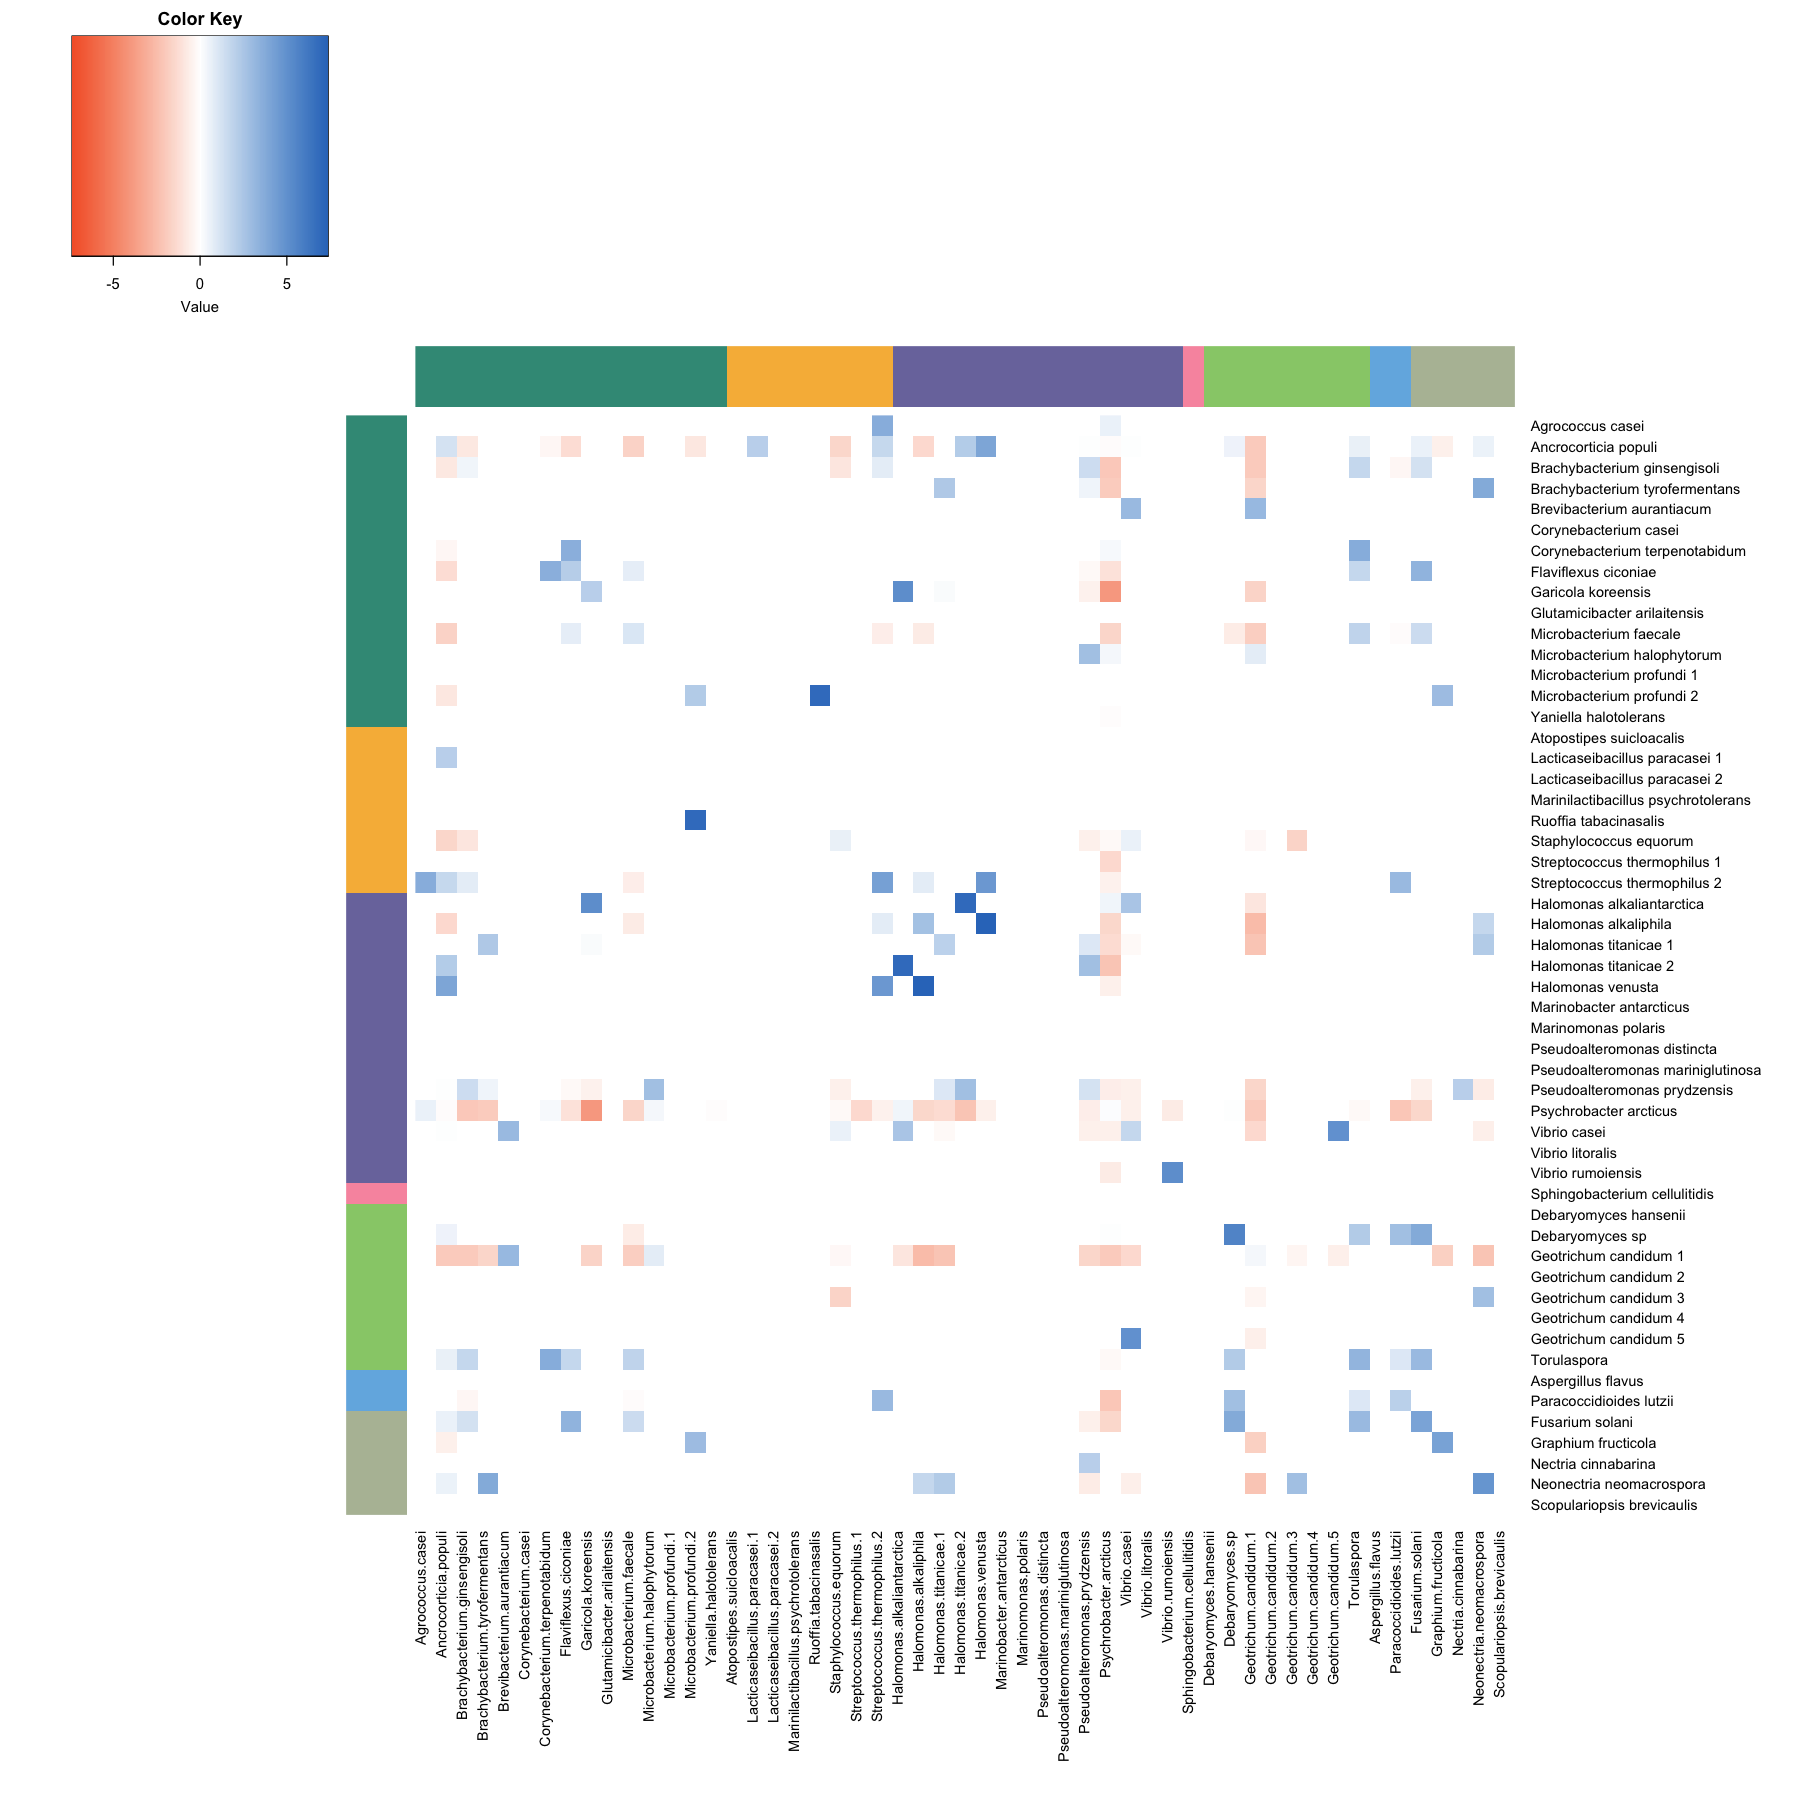

In [247]:
my_palette <- colorRampPalette(c("#f56233", "white", "#3178c4"))(n = 299) #set color palette
options(repr.plot.width=15, repr.plot.height=15) #set plot dimensions

#plot heatmap.  color bars on the top and bottom are based on phylogeny.
heatmap.2(x,Colv = F,Rowv=F,trace="none",col=my_palette,density.info=c("none"),keysize = 1,
  margins =c(18,18),cexRow=1.1,cexCol=1.1,dendrogram = c("none"), ColSideColors=c("#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#F7B846","#F7B846","#F7B846","#F7B846","#F7B846","#F7B846","#F7B846","#F7B846","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#F898AE","#97CD78","#97CD78","#97CD78","#97CD78","#97CD78","#97CD78","#97CD78","#97CD78","#73B5E3","#73B5E3","#B5BEA4","#B5BEA4","#B5BEA4","#B5BEA4","#B5BEA4"),RowSideColors=c("#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#3B9886","#F7B846","#F7B846","#F7B846","#F7B846","#F7B846","#F7B846","#F7B846","#F7B846","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#7A77AB","#F898AE","#97CD78","#97CD78","#97CD78","#97CD78","#97CD78","#97CD78","#97CD78","#97CD78","#73B5E3","#73B5E3","#B5BEA4","#B5BEA4","#B5BEA4","#B5BEA4","#B5BEA4"))


